In [1]:
import matplotlib.patheffects

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
import colorcet

In [3]:
np.random.seed(42)

N = 10_000_000

ID = np.sum(np.random.random(size=(N, 12)), axis=1) - 6

OOD = np.sum(np.random.random(size=(N, 2)), axis=1) - 1
OOD = (1-np.abs(OOD)) * np.sign(OOD) * 6

X = np.random.random(size=N) * 12 - 6

In [4]:
bins = np.array([x*(12/49) - 6 for x in range(49+1)])

X_bins, _ = np.histogram(X, bins=bins)
OOD_bins, _ = np.histogram(OOD, bins=bins)
ID_bins, _ = np.histogram(ID, bins=bins)

In [5]:
c_ood = mpl.cm.get_cmap('cet_CET_L20')(0.1)
c_id = mpl.cm.get_cmap('cet_CET_L20')(0.75)
c_any = mpl.cm.get_cmap('cet_CET_L20')(0.5)
c_idk = mpl.cm.get_cmap('cet_CET_L20')(0.35)

In [6]:
print(f"c_ood = {{{', '.join(str(int(c*255)) for c in c_ood[:3])}}}")
print(f"c_id = {{{', '.join(str(int(c*255)) for c in c_id[:3])}}}")
print(f"c_any = {{{', '.join(str(int(c*255)) for c in c_any[:3])}}}")
print(f"c_idk = {{{', '.join(str(int(c*255)) for c in c_idk[:3])}}}")

c_ood = {64, 57, 110}
c_id = {230, 182, 19}
c_any = {65, 154, 117}
c_idk = {49, 108, 196}


In [7]:
outlined = [
    mpl.patheffects.Stroke(linewidth=5, foreground="white"),
    mpl.patheffects.Normal(),
]

In [8]:
X_scale = 1.0 / np.amax(X_bins)
OOD_scale = (1.0 / np.amax(OOD_bins / X_bins)) / np.amax(X_bins)
ID_scale = (1.0 / np.amax(ID_bins / X_bins)) / np.amax(X_bins)

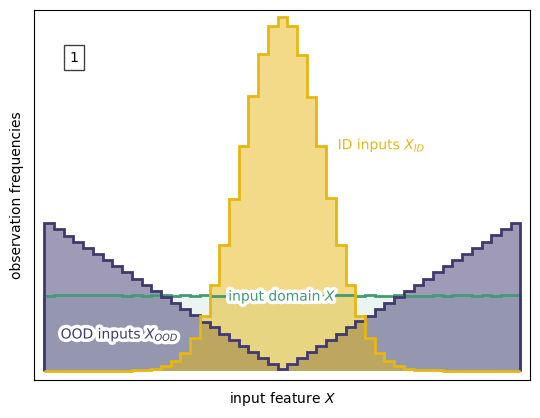

In [9]:
plt.xlabel("input feature $X$")
plt.ylabel("observation frequencies")

plt.hist(X, bins=bins, alpha=0.1, density=True, histtype="stepfilled", color=c_any)
plt.hist(OOD, bins=bins, alpha=0.5, density=True, histtype="stepfilled", color=c_ood)
plt.hist(ID, bins=bins, alpha=0.5, density=True, histtype="stepfilled", color=c_id)

plt.hist(X, bins=bins, density=True, histtype="step", color=c_any, lw=2)
plt.hist(OOD, bins=bins, density=True, histtype="step", color=c_ood, lw=2)
plt.hist(ID, bins=bins, density=True, histtype="step", color=c_id, lw=2)

plt.text(
    0.0, 0.082, "input domain $X$", ha='center', va='center', c=c_any, path_effects=outlined,
)
plt.text(
    -4.1, 0.04, "OOD inputs $X_{OOD}$", ha='center', va='center', c=c_ood, path_effects=outlined,
)
plt.text(
    2.5, 0.25, "ID inputs $X_{ID}$", ha='center', va='center', c=c_id, path_effects=outlined,
)

plt.text(
    0.07, 0.89, "1", ha='left', va='top', transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.75, edgecolor='black'),
)

plt.xlim((-6.25, 6.25))
plt.ylim((-0.01, 0.40))
plt.xticks([], [])
plt.yticks([], [])

plt.savefig("id-ood-weights-1.pdf", dpi=400, transparent=True, bbox_inches='tight')
plt.show()

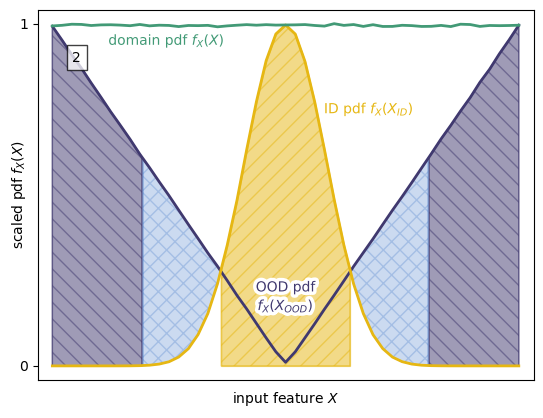

In [10]:
plt.xlabel("input feature $X$")
plt.ylabel("scaled pdf $f_{X}(X)$", labelpad=-6.5)

fine_bins = np.linspace(-6+6/49, 6-6/49, 49*10)
fine_id = np.interp(fine_bins, bins[:-1] + 6/49, ID_bins * ID_scale)
fine_ood = np.interp(fine_bins, bins[:-1] + 6/49, OOD_bins * OOD_scale)

plt.fill_between(
    fine_bins, fine_id, where=(fine_id > fine_ood), color=c_id, alpha=0.5,
)
plt.fill_between(
    fine_bins, fine_id, where=(fine_id > fine_ood), color='None', edgecolor=c_id, alpha=0.5, hatch="//",
)
plt.fill_between(
    fine_bins, fine_ood, where=((fine_ood > fine_id) & (fine_id <= 0.001)), color=c_ood, alpha=0.5,
)
plt.fill_between(
    fine_bins, fine_ood, where=((fine_ood > fine_id) & (fine_id <= 0.001)), color='None', edgecolor=c_ood, alpha=0.5, hatch=r"\\",
)
plt.fill_between(
    fine_bins, fine_id, fine_ood, where=((fine_ood > fine_id) & (fine_id > 0.001)), color=c_idk, alpha=0.25,
)
plt.fill_between(
    fine_bins, fine_id, fine_ood, where=((fine_ood > fine_id) & (fine_id > 0.001)), color='None', edgecolor=c_idk, alpha=0.25, hatch="xx",
)

plt.plot(bins[:-1] + 6/49, OOD_bins * OOD_scale, c=c_ood, lw=2)
plt.plot(bins[:-1] + 6/49, ID_bins * ID_scale, c=c_id, lw=2)
plt.plot(bins[:-1] + 6/49, X_bins * X_scale, c=c_any, lw=2)

plt.text(
    -3.0, 0.95, "domain pdf $f_{X}(X)$", ha='center', va='center', c=c_any, path_effects=outlined,
)
plt.text(
    0.0, 0.2, "OOD pdf\n$f_{X}(X_{OOD})$", ha='center', va='center', c=c_ood, path_effects=outlined,
)
plt.text(
    2.1, 0.75, "ID pdf $f_{X}(X_{ID})$", ha='center', va='center', c=c_id, path_effects=outlined,
)

plt.text(
    0.07, 0.89, "2", ha='left', va='top', transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.75, edgecolor='black'),
)

plt.xlim((-6.25, 6.25))
plt.ylim((-0.04, 1.04))
plt.xticks([], [])
plt.yticks([0.0, 1.0])

plt.savefig("id-ood-weights-2.pdf", dpi=400, transparent=True, bbox_inches='tight')
plt.show()

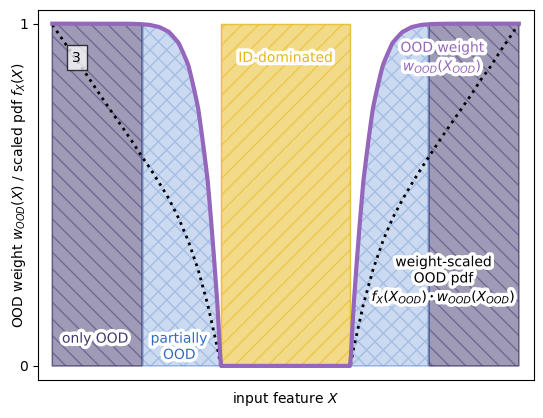

In [11]:
plt.xlabel("input feature $X$")
plt.ylabel("OOD weight $w_{OOD}(X)$ / scaled pdf $f_{X}(X)$", labelpad=-6.5)

colours = plt.rcParams['axes.prop_cycle'].by_key()['color']

ood_weight = 1.0 - fine_id / np.maximum(fine_id, fine_ood)
fine_ood_weight = np.interp(fine_bins, bins[:-1] + 6/49, OOD_bins/np.amax(OOD_bins))

plt.fill_between(
    fine_bins, ood_weight, 1.0, where=(fine_id > fine_ood), color=c_id, alpha=0.5,
)
plt.fill_between(
    fine_bins, ood_weight, 1.0, where=(fine_id > fine_ood), color='None', edgecolor=c_id, alpha=0.5, hatch="//",
)
plt.fill_between(
    fine_bins, ood_weight, where=((fine_ood > fine_id) & (fine_id <= 0.001)), color=c_ood, alpha=0.5,
)
plt.fill_between(
    fine_bins, ood_weight, where=((fine_ood > fine_id) & (fine_id <= 0.001)), color='None', edgecolor=c_ood, alpha=0.5, hatch=r"\\",
)
plt.fill_between(
    fine_bins, ood_weight, where=((fine_ood > fine_id) & (fine_id > 0.001)), color=c_idk, alpha=0.25,
)
plt.fill_between(
    fine_bins, ood_weight, where=((fine_ood > fine_id) & (fine_id > 0.001)), color='None', edgecolor=c_idk, alpha=0.25, hatch="xx",
)

plt.plot(
    fine_bins, fine_ood_weight * ood_weight, c="black", lw=2, ls=":",
)
plt.plot(
    fine_bins, ood_weight, c=colours[4], lw=3,
)

plt.text(
    -4.8, 0.1, "only OOD", ha='center', va='top', c=c_ood, path_effects=outlined,
)
plt.text(
    -2.68, 0.1, "partially\nOOD", ha='center', va='top', c=c_idk, path_effects=outlined,
)
plt.text(
    0.0, 0.9, "ID-dominated", ha='center', va='center', c=c_id, path_effects=outlined,
)
plt.text(
    3.98, 0.25, "weight-scaled\nOOD pdf\n$f_{X}(X_{OOD}) \cdot w_{OOD}(X_{OOD})$",
    ha='center', va='center', c="black", path_effects=outlined,
)
plt.text(
    3.95, 0.9, "OOD weight\n$w_{OOD}(X_{OOD})$", ha='center', va='center',
    c=colours[4], path_effects=outlined,
)

plt.text(
    0.07, 0.89, "3", ha='left', va='top', transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.75, edgecolor='black'),
)

plt.xlim((-6.25, 6.25))
plt.ylim((-0.04, 1.04))
plt.xticks([], [])
plt.yticks([0.0, 1.0])

plt.savefig("id-ood-weights-3.pdf", dpi=400, transparent=True, bbox_inches='tight')
plt.show()